<a href="https://colab.research.google.com/github/Melisacid/Act.7.1_Regresion_no_lineal/blob/main/Act7_1_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ACTIVIDAD GRUPAL**
Alexa Bustamante de la Cruz - A01173639

Melissa Hernandez Cid - A01732341

In [ ]:
#Cargamos librerias
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv desde seaborn
df1= pd.read_csv("Gastos y costos 2020.csv")
df2 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name='2021')
df3 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name='2022')
df4 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name='2023')

#**Gastos y costos 2020**

In [ ]:
df1 = df1.replace('-', 0)
df1["TOTAL MX"] = df1["TOTAL MX"].astype(float)
q1 = df1['TOTAL MX'].quantile(0.25)
q3 = df1['TOTAL MX'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df1 = df1[(df1['TOTAL MX'] >= umbral_inf) & (df1['TOTAL MX'] <= umbral_sup)]
q1 = df1['IVA'].quantile(0.25)
q3 = df1['IVA'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df1 = df1[(df1['IVA'] >= umbral_inf) & (df1['IVA'] <= umbral_sup)]

In [ ]:
df2["FOLIO"] = df2["FOLIO"].fillna(value="0")
df2["MP"] = df2["MP"].fillna(value="0")
df2["POLIZA"] = df2["POLIZA"].fillna(value="0")
print(df2.isnull().sum())
#print("-----------------")


   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df1['IVA']
Var_Dep= df1['TOTAL MX']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

**Modelo 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['IVA'], df1['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([8.97153931e-05, 6.94562576e+00, 6.21635292e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df1['IVA'], df1['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

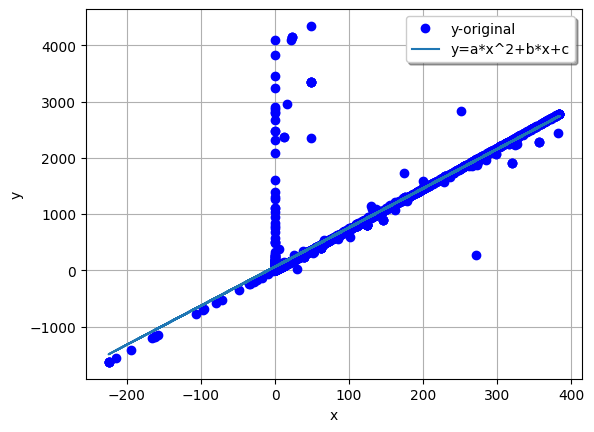

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.8174859168463374

**Modelo 2**

In [ ]:
def func2(x, a, b, c, max_val=1000):
    return np.minimum(a * np.exp(b * x) + c, max_val)

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df1['IVA'], df1['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 2.41221719e+05,  2.87811252e-05, -2.41159510e+05,  2.78417400e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df1['IVA'], df1['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


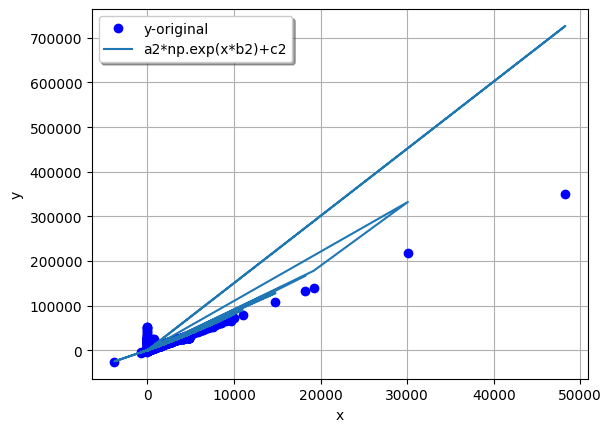

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a2*np.exp(x*b2)+c2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
R2 = r2_score(y, yfit2)
R2

0.5338554466254302

# **Gastos costos 2021**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
df2.dropna(inplace=True)
Vars_Indep= df2['IVA']
Var_Dep= df2['TOTAL MX']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

**MODELO 1**

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2['IVA'], df2['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.17615828e-05, 6.74758103e+00, 7.08455144e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df2['IVA'], df2['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

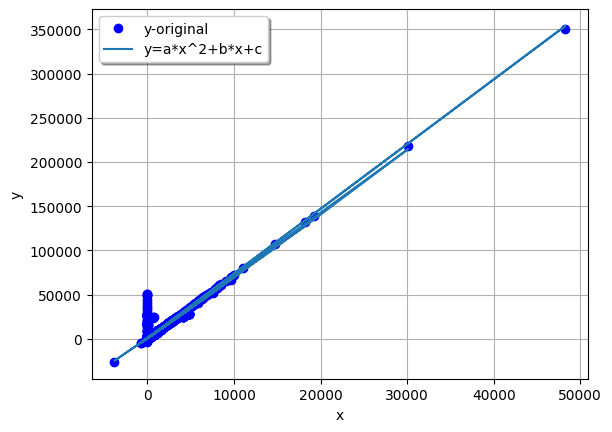

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.9028388872975792

**MODELO 2**

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df2['IVA'], df2['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 9.86871112e+05,  6.73768715e-06, -9.86129299e+05,  3.50000000e+05])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df2['IVA'], df2['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

0       1263.250921
1       1108.919366
2       4416.285543
3       6665.499301
4       6666.168216
           ...     
3030     741.813673
3031     741.813673
3032    5444.546023
3033     741.813673
3034     741.813673
Name: IVA, Length: 3035, dtype: float64

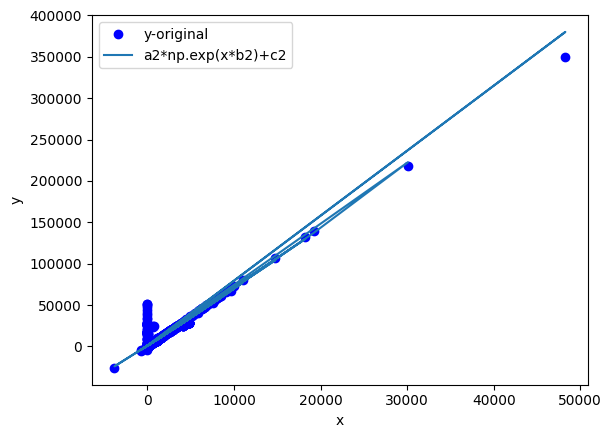

In [ ]:

# graficar los resultados
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a2*np.exp(x*b2)+c2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
# calcular el valor de R^2 para el modelo
R2 = r2_score(y, yfit2)
R2

0.900993936597991

#**Gastos y costos 2022**

In [ ]:
df3 = df3.replace('-', 0)
df3["TOTAL MX"] = df3["TOTAL MX"].astype(float)
q1 = df3['TOTAL MX'].quantile(0.25)
q3 = df3['TOTAL MX'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df3 = df3[(df3['TOTAL MX'] >= umbral_inf) & (df3['TOTAL MX'] <= umbral_sup)]
q1 = df3['IVA'].quantile(0.25)
q3 = df3['IVA'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df3 = df3[(df3['IVA'] >= umbral_inf) & (df3['IVA'] <= umbral_sup)]

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
df3.dropna(inplace=True)
Vars_Indep= df3['IVA']
Var_Dep= df3['TOTAL MX']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df3['IVA'], df3['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([2.10180116e-03, 6.77765921e+00, 2.06373083e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df3['IVA'], df3['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

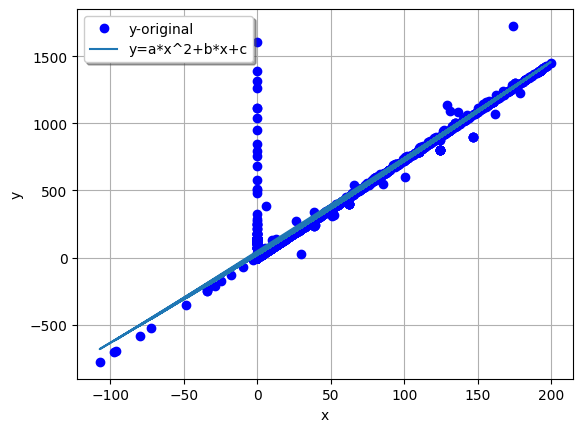

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.9399596444021526

**Modelo 2**

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df3['IVA'], df3['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([ 1.11520535e+04,  6.07569441e-04, -1.11313715e+04,  1.42713400e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df3['IVA'], df3['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

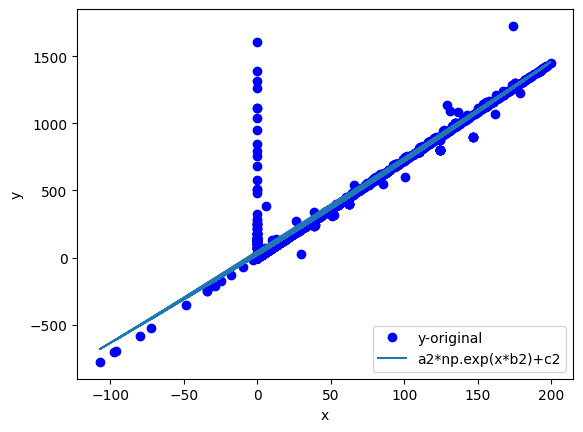

In [ ]:

# graficar los resultados
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a2*np.exp(x*b2)+c2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit2) 
R2

0.9399616114014607

#**Gastos y costos 2023**

In [ ]:
df4 = df4.replace('-', 0)
df4["TOTAL MX"] = df4["TOTAL MX"].astype(float)
q1 = df4['TOTAL MX'].quantile(0.25)
q3 = df4['TOTAL MX'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df3 = df4[(df4['TOTAL MX'] >= umbral_inf) & (df4['TOTAL MX'] <= umbral_sup)]
q1 = df4['IVA'].quantile(0.25)
q3 = df4['IVA'].quantile(0.75)
iqr = q3 - q1
factor = 1.5
umbral_inf = q1 - factor * iqr
umbral_sup = q3 + factor * iqr
df4 = df4[(df4['IVA'] >= umbral_inf) & (df4['IVA'] <= umbral_sup)]

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df4['IVA']
Var_Dep= df4['TOTAL MX']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df4['IVA'], df4['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.53583761e-02, -3.64465526e+00,  1.58580818e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df4['IVA'], df4['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

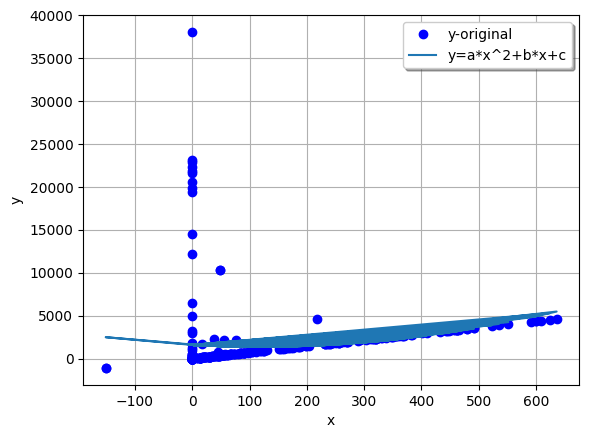

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.025259677349355747

**Modelo 2**

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df4['IVA'], df4['TOTAL MX'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 743.94752112,   -8.1717335 , 1460.8247105 , 2204.76955584])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df4['IVA'], df4['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

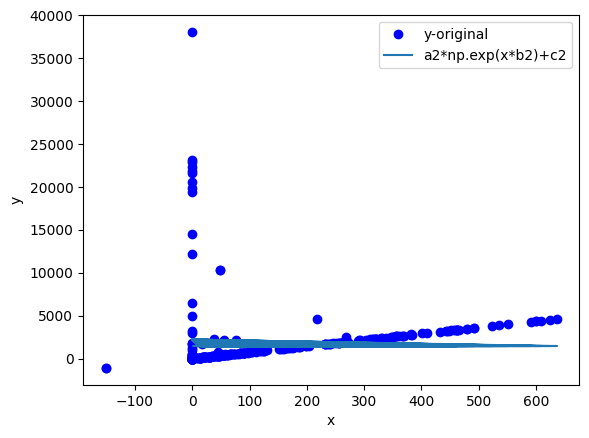

In [ ]:
# graficar los resultados
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a2*np.exp(x*b2)+c2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


-inf